# <u>Machine Learning Final Project - Titanic Dataset Analysis & Classification Algorithms</u>

In this project, our objective is to conduct an in-depth exploration and analysis of the Titanic dataset. We use three distinct classification algorithms—K-Nearest Neighbors (KNN), Naive Bayes, and Support Vector Machine (SVM)—to forecast the survival outcomes of passengers aboard the Titanic. Furthermore, we use an Artificial Neural Network (ANN) for comprehensive analysis. Our study includes a comparative examination of the performance of these algorithms based on various evaluation metrics.

# Importing Important Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
import seaborn as sns
sns.set_style('darkgrid')

# Loading Data from .csv files

In [49]:
train = pd.read_csv('titanic.csv')
test = pd.read_csv('test.csv')

In [50]:
train.info()
print("-"*15)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    19 non-null     int64  
 1   name      19 non-null     object 
 2   sex       19 non-null     object 
 3   age

# Getting statistical information about the data

In [51]:
train.describe(include='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,2.294882,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,0.381971
std,0.837836,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,0.486055
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [52]:
test.describe(include='all')

,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
count,19.000000,19,19,18.000000,19.000000,19.000000,19,19.000000,2,19
unique,NaN,19,2,NaN,NaN,NaN,19,NaN,2,3
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,330911,NaN,B45,S
freq,NaN,1,11,NaN,NaN,NaN,1,NaN,1,12
mean,2.421053,NaN,NaN,32.638889,0.526316,0.105263,NaN,20.066232,NaN,NaN
std,0.768533,NaN,NaN,14.576175,0.611775,0.315302,NaN,20.221058,NaN,NaN
min,1.000000,NaN,NaN,14.000000,0.000000,0.000000,NaN,7.000000,NaN,NaN
25%,2.000000,NaN,NaN,22.250000,0.000000,0.000000,NaN,7.862500,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,9.687500,NaN,NaN
75%,3.000000,NaN,NaN,43.250000,1.000000,0.000000,NaN,26.000000,NaN,NaN


In [53]:
train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [54]:
test

,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# <u>Preprocessing:-</u>

# Fixing incorrect column name in test data "sibSp"

In [55]:
test.rename(columns={'sibSp': 'sibsp'}, inplace=True)

In [56]:
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Checking the percentage of missing values

In [57]:
# Percentage of null values in training set
missing_percentage_train = (train.isnull().sum() / len(train)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage_train)
print("-"*15)

# Percentage of null values in testing set
missing_percentage_test = (test.isnull().sum() / len(test)) * 100
print("Percentage of missing values for testing data:")
print(missing_percentage_test)

Percentage of missing values for training data:
pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
survived     0.000000
dtype: float64
---------------
Percentage of missing values for testing data:
pclass       0.000000
name         0.000000
sex          0.000000
age          5.263158
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin       89.473684
embarked     0.000000
dtype: float64


# Handling Missing Values

## Handling cabin

The feauture "cabin" has an overwhelming majority of null values, thus providing little value to the dataset. We can deal with that problem by removing the feature.

In [58]:
train.drop('cabin', axis=1, inplace=True)
test.drop('cabin', axis=1, inplace=True)
print(f"Training Data Shape: {train.shape}")
print(f"testing Data Shape: {test.shape}")

Training Data Shape: (1309, 10)
testing Data Shape: (19, 9)


## Handling missing values in other feautures

In [59]:
# Impute the missing values in the "age" column in training and testing sets with the mean value of the column
mean_age = train['age'].mean()
train['age'] = train['age'].fillna(mean_age)
test['age'] = test['age'].fillna(mean_age)

# Impute missing values with mode
train['embarked'].fillna(train['embarked'].mode()[0], inplace=True)

train['fare'].fillna(train['fare'].mode()[0], inplace=True)
test['fare'].fillna(train['fare'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22904\2698931947.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['embarked'].fillna(train['embarked'].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22904\2698931947.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

## Final missing value check 

In [60]:
# Percentage of null values in training set
missing_percentage = (train.isnull().sum() / len(test)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage)
print("-"*15)

# Percentage of null values in testing set
missing_percentage = (test.isnull().sum() / len(test)) * 100
print("Percentage of missing values for testing data:")
print(missing_percentage)

Percentage of missing values for training data:
pclass      0.0
name        0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
ticket      0.0
fare        0.0
embarked    0.0
survived    0.0
dtype: float64
---------------
Percentage of missing values for testing data:
pclass      0.0
name        0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
ticket      0.0
fare        0.0
embarked    0.0
dtype: float64


## Checking for duplicates values 

In [61]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


# Selecting numerical Features

In [62]:
numerical_columns = train.select_dtypes(include=['int64','float64']).columns

# Handling outliers 

Here, we are using a function designed to detect and eliminate outliers. This function accepts three parameters: the dataset, the selected numerical columns, and an optional threshold value (default set to 1.5).

For each numerical column, the function computes the first quartile (q1), third quartile (q3), and interquartile range (IQR). Then, it establishes lower and upper bounds based on the IQR and the provided threshold. Using these bounds, a mask (outliers_mask) is created to identify rows containing outlier values.

The dataset is then updated by removing these outlier rows, and the index is reset using "reset_index" to ensure that the outlier indices are dropped. Finally, the updated dataset is returned.

At the end, the number of removed rows is printed.

In [63]:
numerical_columns = train.select_dtypes(include=['int64','float64']).columns
categorical_cols =  train.select_dtypes(include=['object']).columns

def remove_outliers_IQR(original_data, numerical_columns, threshold=1.5):
    for col in numerical_columns:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_train = remove_outliers_IQR(train, numerical_columns)

# Displaying the number of outliers removed from each numerical column
for col in numerical_columns:
    outliers_removed = len(train[col]) - len(new_train[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}")

Number of outliers removed in pclass: 477
Number of outliers removed in age: 477
Number of outliers removed in sibsp: 477
Number of outliers removed in parch: 477
Number of outliers removed in fare: 477
Number of outliers removed in survived: 477


## Geting a summary of statistical information about Numerical Columns

In [64]:
new_train.describe(include='number')

,pclass,age,sibsp,parch,fare,survived
count,832.000000,832.000000,832.000000,832.0,832.000000,832.000000
mean,2.510817,29.430423,0.191106,0.0,13.828785,0.283654
std,0.719258,8.182520,0.447770,0.0,10.370550,0.451042
min,1.000000,5.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,24.000000,0.000000,0.0,7.775000,0.000000
50%,3.000000,29.881135,0.000000,0.0,8.658350,0.000000
75%,3.000000,32.000000,0.000000,0.0,15.500000,1.000000
max,3.000000,54.000000,2.000000,0.0,53.100000,1.000000


## Getting a summary of statistical information about Categorical Columns

In [65]:
new_train.describe(include='object')

,name,sex,ticket,embarked
count,832,832,832,832
unique,830,2,747,3
top,"Connolly, Miss. Kate",male,LINE,S
freq,2,620,4,602


# <u>Visualization and Analysis:-</u>

# Distributions of Numerical columns

In this step, we plot histograms for various numerical columns within our dataset to gain a deeper understanding of the data distribution.

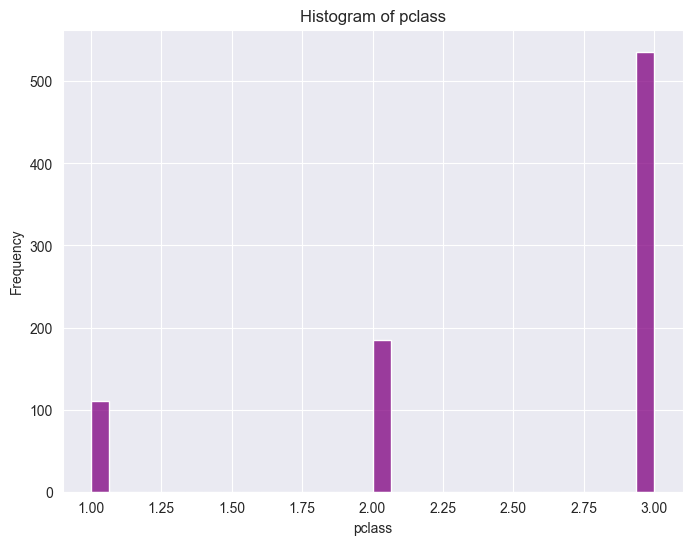

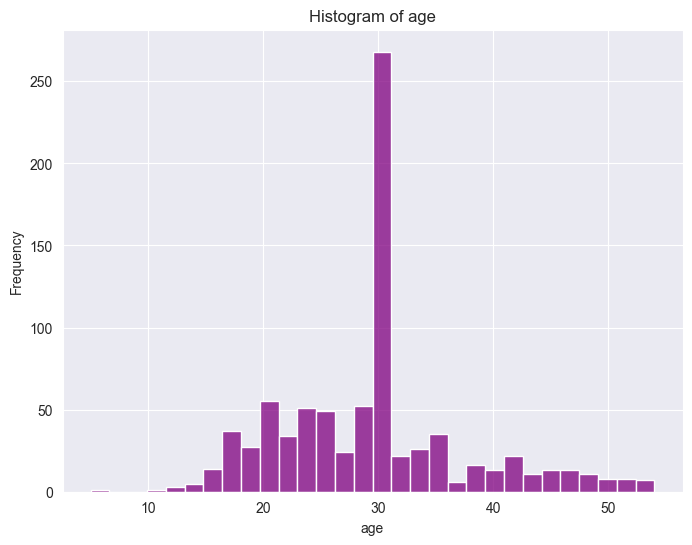

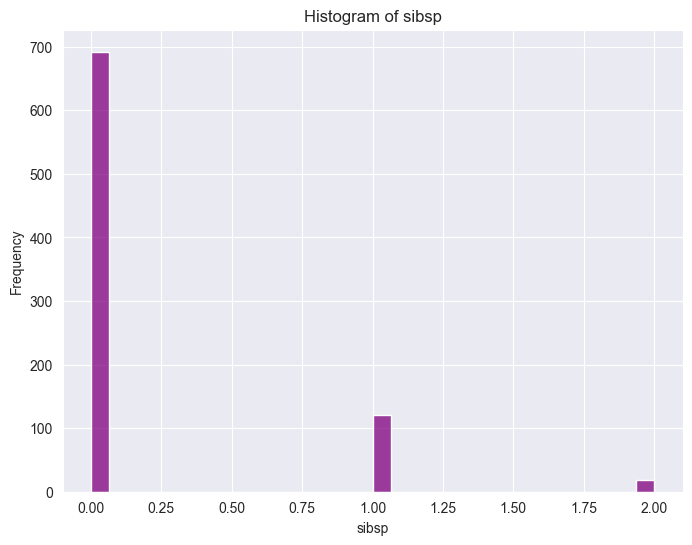

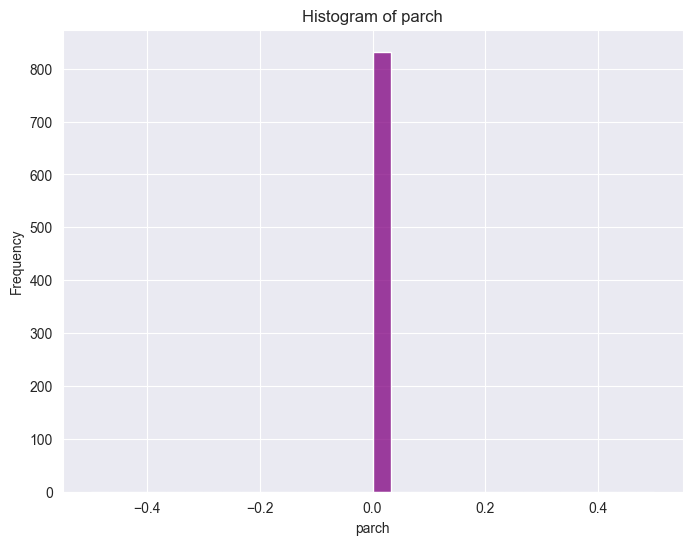

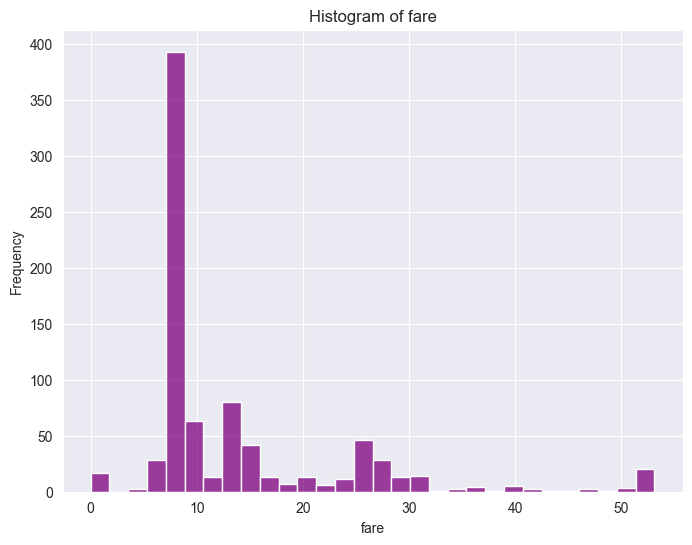

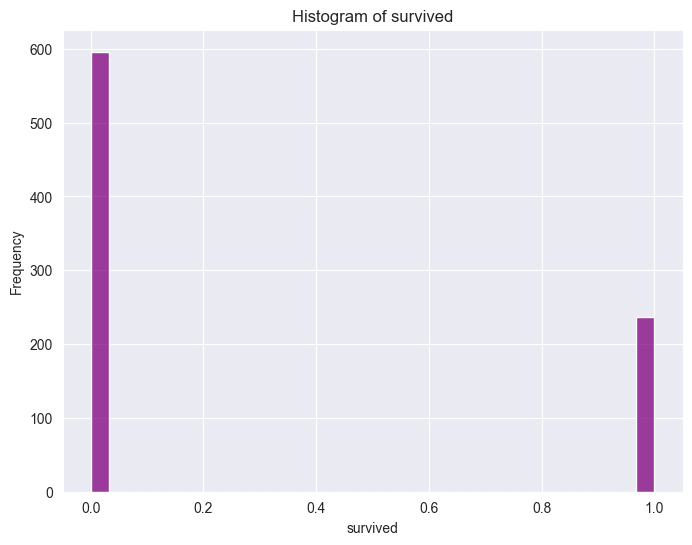

In [66]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(new_train[col], bins=30,color='purple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Distribution of categorical columns

In the following figure we notice that a majority (74.5%) of the passengers were male compared to the 25.5% female.

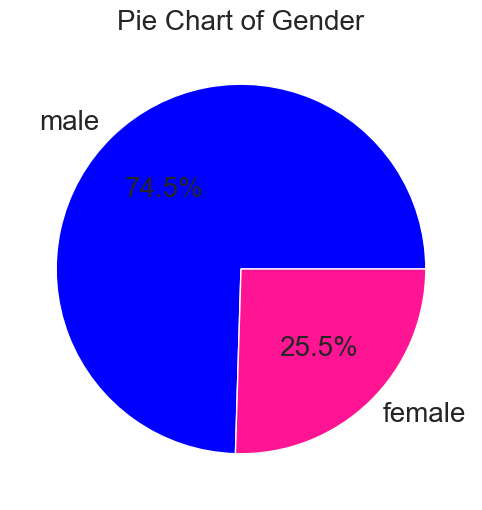

In [67]:
# Plotting using a pie chart
gender_counts = new_train['sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels = gender_counts.index, textprops={'fontsize': 20}, autopct='%1.1f%%', colors = ['blue', 'deeppink'])
plt.title('Pie Chart of Gender', fontsize = 20)
plt.show()

In this plot we deduce that the majority of passengers embarked at Southampton compared to Cherbourg and Queenstown.

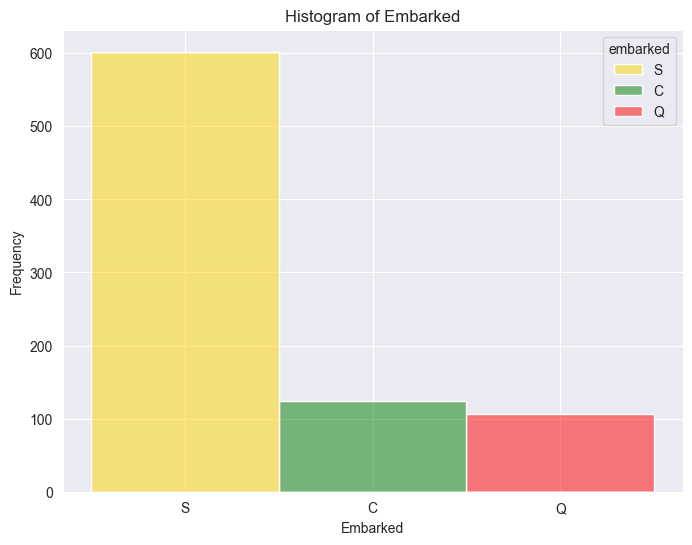

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(new_train, x='embarked',hue='embarked',bins=30,palette={'C': 'green', 'S': 'gold','Q':'red'})
plt.title(f'Histogram of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()

In this plot, we illustrate the relationship between age groups and the fare paid for the journey. Observing the graph's shape, it shows that the fare tends to increase with age. However, it's notable that the correlation between the two variables is very low.

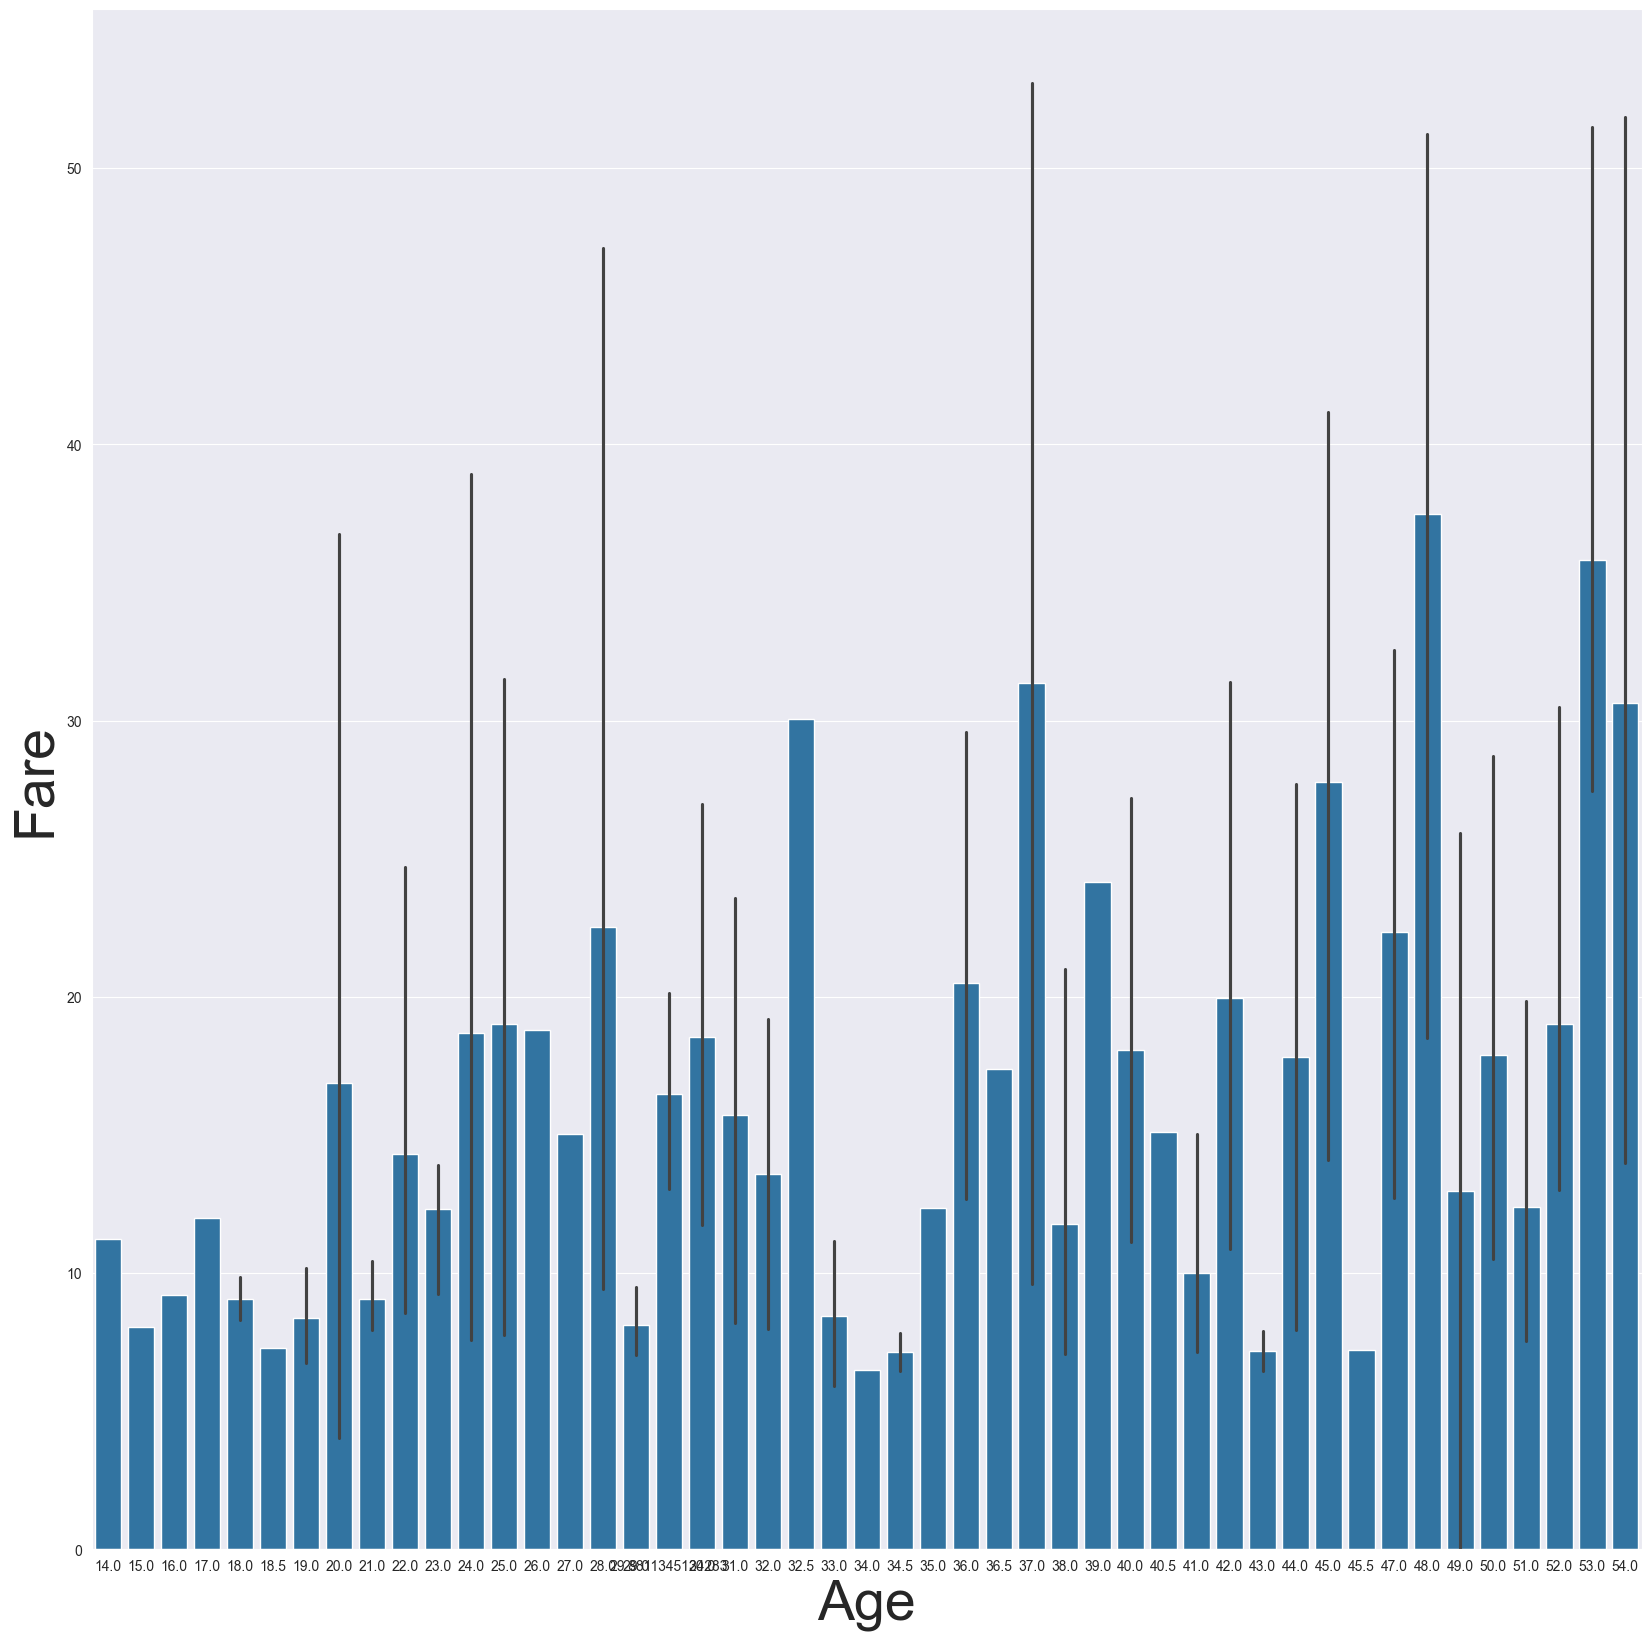

In [69]:
grouped = new_train.groupby("fare")["age"].max()

plt.subplots(figsize=(20, 20))
sns.barplot(x = grouped.values, y = grouped.index)
plt.ylabel('Fare', fontsize=40)
plt.xlabel('Age', fontsize=40)
plt.show()

## Correlation between numerical features

In this step, we construct a heatmap for our numerical features to evaluate their correlation with the target variable. On observation, it becomes apparent that the "parch" feature contains only one value, rendering it devoid of correlation with the target. So, we opt to remove this feature from our analysis.

<Axes: title={'center': 'Heatmap showing correlation for all numerical features'}>

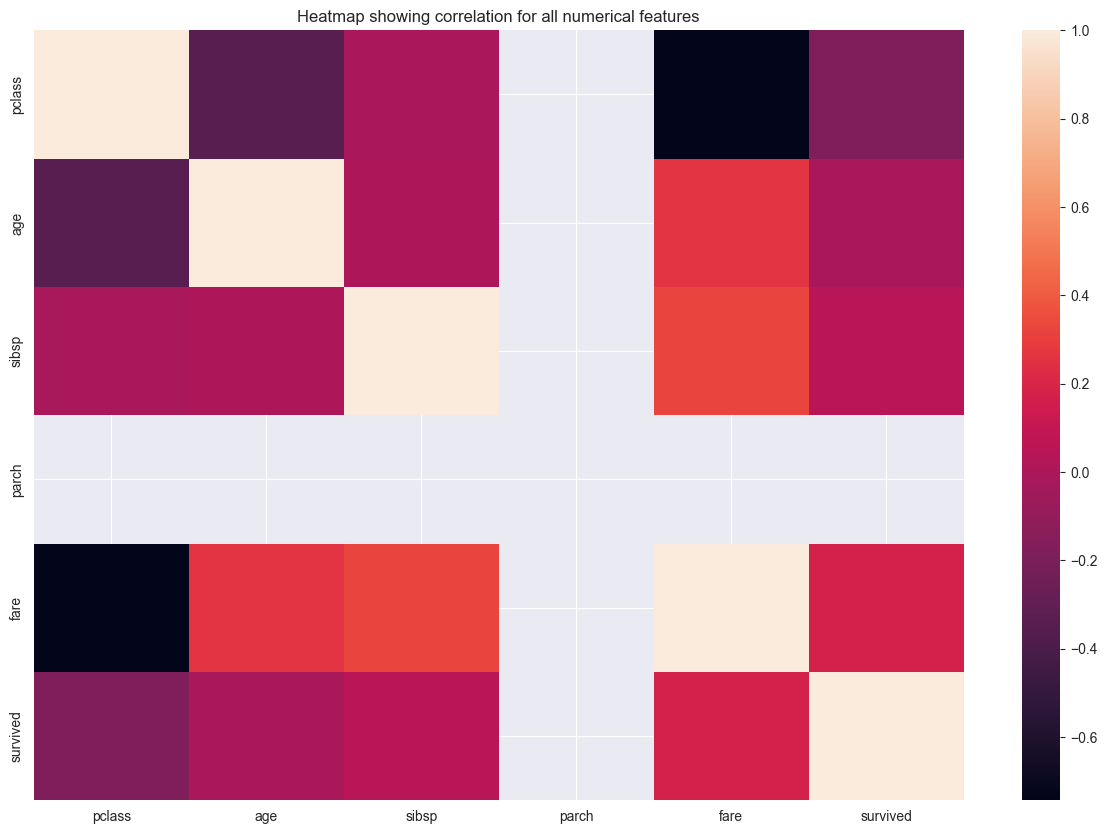

In [70]:
corr_matrix = new_train[numerical_columns].corr()
plt.figure(figsize = (15,10))
plt.title("Heatmap showing correlation for all numerical features")
sns.heatmap(corr_matrix)

# Selecting relevant columns to the target

Based on the insights gained from our preprocessing steps, we proceed to select the most relevant and useful features for our analysis.

In [71]:
cdf = ['sex','age','sibsp','fare','survived']
cdf_train = new_train[cdf]

In [72]:
cdf_train

,sex,age,sibsp,fare,survived
0,male,48.000000,0,26.5500,1
1,male,39.000000,0,0.0000,0
2,female,53.000000,2,51.4792,1
3,male,29.881135,0,25.9250,0
4,male,26.000000,0,30.0000,1
...,...,...,...,...,...
827,female,14.500000,1,14.4542,0
828,female,29.881135,1,14.4542,0
829,male,26.500000,0,7.2250,0
830,male,27.000000,0,7.2250,0


## Performing Scaling 

Here we use Min-Max Scaler from scikit-learn to normalize the 'age' and 'fare' features of our set. We reshape the 'age' and 'fare' features to a single column format (2D). The scaler is fitted to the data, and then, it transforms both the training and testing datasets. Finally, the transformed features are assigned back to their respective columns in the dataset.

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler and required features
scaler = MinMaxScaler()
age = cdf_train['age'].values.reshape(-1, 1)
fare = cdf_train['fare'].values.reshape(-1, 1)

# Fitting them to the scaler
model_age = scaler.fit(age)
model_fare = scaler.fit(fare)

# Transforming the features in training and testing sets
cdf_train.loc[:, 'age'] = model_age.transform(age)
cdf_train.loc[:, 'fare'] = model_age.transform(fare)
test['age'] = model_age.transform(test['age'].values.reshape(-1, 1))
test['fare'] = model_fare.transform(test['fare'].values.reshape(-1, 1))

In [74]:
cdf_train

,sex,age,sibsp,fare,survived
0,male,0.903955,0,0.500000,1
1,male,0.734463,0,0.000000,0
2,female,0.998117,2,0.969476,1
3,male,0.562733,0,0.488230,0
4,male,0.489642,0,0.564972,1
...,...,...,...,...,...
827,female,0.273070,1,0.272207,0
828,female,0.562733,1,0.272207,0
829,male,0.499058,0,0.136064,0
830,male,0.508475,0,0.136064,0


# Perform Encoding to Categorical Feartures

Here we use scikit-learn's LabelEncoder to convert categorical data (specifically the 'sex' feature) into numerical format. We initialize the label encoder, fit it to the 'sex' column in the training dataset ('cdf_train'), and transforms the data accordingly. Similarly, it performs the same transformation on the 'sex' column in the testing dataset ('test').

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cdf_train.loc[:, 'sex'] = label_encoder.fit_transform(cdf_train['sex'])

test['sex'] = label_encoder.fit_transform(test['sex'])

In [76]:
cdf_train

,sex,age,sibsp,fare,survived
0,1,0.903955,0,0.500000,1
1,1,0.734463,0,0.000000,0
2,0,0.998117,2,0.969476,1
3,1,0.562733,0,0.488230,0
4,1,0.489642,0,0.564972,1
...,...,...,...,...,...
827,0,0.273070,1,0.272207,0
828,0,0.562733,1,0.272207,0
829,1,0.499058,0,0.136064,0
830,1,0.508475,0,0.136064,0


## Splitting the cdf data into train and test

In [77]:
X = cdf_train.drop(columns = 'survived')
y = cdf_train['survived']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,random_state=42)

# <u>Applying Algorithms</u>

# K-Nearest Neighbors (KNN)

## Initializing KNN classifier with different distance metrics

Here, we build two K-Nearest Neighbors (KNN) classifiers with different distance metrics: Euclidean and Manhattan. After training both models on the training data, they are tested on the test data to generate predictions. The accuracy of each model is then calculated using the accuracy_score function from scikit-learn. Finally, the accuracies of both models are printed out for comparison.

In [78]:
knn_euclidean = KNeighborsClassifier(metric = 'euclidean')
knn_manhattan = KNeighborsClassifier(metric = 'manhattan')

# Train models
knn_euclidean.fit(train_X, train_y)
knn_manhattan.fit(train_X, train_y)


# Test models
y_pred_euclidean = knn_euclidean.predict(test_X)
y_pred_manhattan = knn_manhattan.predict(test_X)


# Calculate evaluation metrics for each distance metric
accuracy_euclidean = accuracy_score(test_y, y_pred_euclidean)
accuracy_manhattan = accuracy_score(test_y, y_pred_manhattan)


print("Accuracy (Euclidean):", accuracy_euclidean)
print("Accuracy (Manhattan):", accuracy_manhattan)

Accuracy (Euclidean): 0.796
Accuracy (Manhattan): 0.808


## Selecting the best value for k to apply KNN 

In this part we iterate through different values of k (number of neighbors) and construct K-Nearest Neighbors (KNN) classifiers for each value. And then we train these classifiers on the training data and evaluate their performance on the test data. The accuracy of each classifier is printed out, and the highest accuracy achieved among all values of k is also identified and printed.

In [79]:
n_neighbors = [1,3,5,7,9]
accuracy_n_neighbors = []

for k in n_neighbors:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(train_X, train_y)
 y_pred = knn.predict(test_X)
 accuracy = accuracy_score(test_y, y_pred)
 print("accuracy when k = ", k, ' : ', accuracy)
 accuracy_n_neighbors.append(accuracy)

Highest_accuracy = max(accuracy_n_neighbors)
print('The Highest accuracy is ', Highest_accuracy)

accuracy when k =  1  :  0.744
accuracy when k =  3  :  0.776
accuracy when k =  5  :  0.796
accuracy when k =  7  :  0.796
accuracy when k =  9  :  0.788
The Highest accuracy is  0.796


## Apply KNN Algorithm

Now we apple the KNN classifier with (6 neighbors, Manhattan distance metric), train it on the training data, and predict the labels for the test data. Then, we calculate several evaluation metrics including accuracy, F1-score, recall, and precision using scikit-learn functions and prints them out.

In [80]:
# Initialize Model
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
KNN_model.fit(train_X, train_y)
y_pred_KNN = KNN_model.predict(test_X)

# Compute Accuracy
accuracy_KNN = accuracy_score(y_pred_KNN, test_y)
print('Accuracy = ', accuracy_KNN)

# Compute F1-Score
F1Score_KNN = f1_score(y_pred_KNN, test_y)
print('F1-Score = ', F1Score_KNN)

# Compute Recall
Recall_KNN = recall_score(y_pred_KNN, test_y)
print('Recall = ', Recall_KNN)

# Compute Precision
Precision_KNN = precision_score(y_pred_KNN, test_y)
print('Precision = ', Precision_KNN)

Accuracy =  0.808
F1-Score =  0.6417910447761194
Recall =  0.7166666666666667
Precision =  0.581081081081081


## Loading test data

In [81]:
test = test[cdf[:-1]]

## Predicting using test data

In [82]:
# Predict using the KNN model
predictions = KNN_model.predict(test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# Naive-Bayes Classifier

## Apply Naive-Bayes Classifier Algorithm

We initialize a Gaussian Naive Bayes (NB) classifier and train it on the training data. Next, we predict labels for the test data and calculate several evaluation metrics including accuracy, recall, F1-score, and precision using scikit-learn functions and print them out.

In [83]:
# Initialize model
GaussianNB_model = GaussianNB()

#Train Model
GaussianNB_model.fit(train_X, train_y)

# test model
y_predict_NB = GaussianNB_model.predict(test_X)

# Compute Accuracy
accuracy_NB = accuracy_score(y_predict_NB, test_y)
print(f'Accuracy = {accuracy_NB}')

# Compute Recall 
Recall_NB = recall_score(y_predict_NB, test_y)
print(f'Recall = {Recall_NB}')

# Compute F1_Score
F1_Score_NB = f1_score(y_predict_NB, test_y)
print(f'F1_Sore = {F1_Score_NB}')

# Compute Precision
Precision_NB = precision_score(y_predict_NB, test_y)
print(f'Precision = {Precision_NB}')

Accuracy = 0.784
Recall = 0.6351351351351351
F1_Sore = 0.6351351351351351
Precision = 0.6351351351351351


## Predicting using test data

In [84]:
predictions = GaussianNB_model.predict(test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Support Vector Machine

## Apply Support Vector Classifier (SVC)

We initialize a Support Vector Machine (SVM) model with different kernel functions and regularization parameters. Hyperparameter tuning is conducted using GridSearchCV to find the best combination of parameters. The model is then trained with the best hyperparameters obtained from the grid search. After training, the model is evaluated using the test data, and several evaluation metrics including accuracy, recall, F1-score, and precision are computed. Finally, the computed values for each metric are printed out along with the best hyperparameters found during the grid search.

In [85]:
# Instantiate the SVM model with different kernel functions and regularization parameters
param_grid = {
    'C': [0.1, 1, 10],
      # C --->regularization parameters which controls the trade-off between maximizing the margin and minimizing the classification error.
    'gamma': [0.1, 0.01, 0.001],
      # gamma ---> Kernel Parameter
    'kernel': ['linear', 'poly', 'rbf']
}
svm = SVC()

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(train_X, train_y)

# Evaluate the model
y_pred_SVM = best_svm.predict(test_X)
print("Best hyperparameters:", best_params)

# Compute Accuracy
accuracy_SVM = accuracy_score(test_y, y_pred_SVM)
print("Accuracy:", accuracy_SVM )

# Compute Recall 
Recall_SVM=recall_score(y_pred_SVM,test_y)
print(f'Recall = {Recall_SVM}')

# Compute F1_Score
F1_Score_SVM=f1_score(y_pred_SVM,test_y)
print(f'F1_Sore = {F1_Score_SVM}')

# Compute Precision
Precision_SVM=precision_score(y_pred_SVM,test_y)
print(f'Precision = {Precision_SVM}')

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.808
Recall = 0.696969696969697
F1_Sore = 0.6571428571428571
Precision = 0.6216216216216216


## Predicting using test data

In [86]:
predictions_SVM = best_svm.predict(test)
predictions_SVM

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
      dtype=int64)

# <u>Comparative Analysis :-</u>

We create a grouped bar plot comparing different evaluation metrics (accuracy, recall, F1-score, and precision) for our three models. Each model's metrics are represented by differently colored bars, with labels indicating the corresponding metrics. The plot provides a visual comparison of the performance of the models across these metrics.

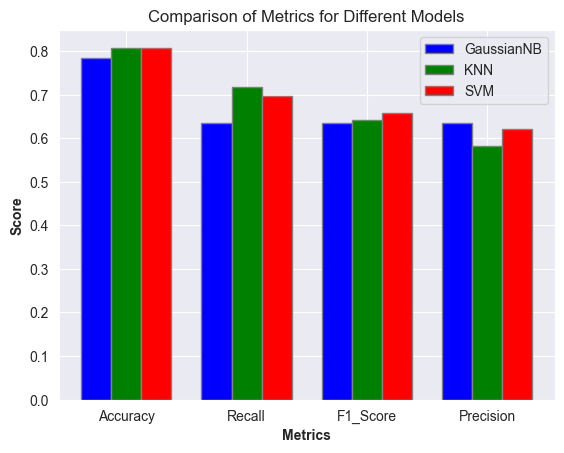

In [87]:
# Metrics for Gaussian Naive Bayes model
metrics_GaussianNB = [accuracy_NB, Recall_NB, F1_Score_NB, Precision_NB]

# Metrics for K-Nearest Neighbors model
metrics_KNN = [accuracy_KNN, Recall_KNN, F1Score_KNN , Precision_KNN]

# Metrics for SVM model
metrics_SVM = [accuracy_SVM, Recall_SVM, F1_Score_SVM, Precision_SVM]

labels = ['Accuracy', 'Recall', 'F1_Score', 'Precision']

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
plt.bar(r1, metrics_GaussianNB, color='b', width=bar_width, edgecolor='grey', label='GaussianNB')
plt.bar(r2, metrics_KNN, color='g', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(r3, metrics_SVM, color='r', width=bar_width, edgecolor='grey', label='SVM')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

# Add ylabel
plt.ylabel('Score', fontweight='bold')

# Add title
plt.title('Comparison of Metrics for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()

# Observations on our analysis :-

### While all three models exhibit similar accuracy, SVM shows a slightly higher accuracy compared to the others.
### KNN demonstrates the highest recall among the models, indicating its strength in correctly identifying positive instances.
### However, KNN performs relatively poorly in precision and F1 score.
### Gaussian NB and SVM models show comparable precision, F1 score, and recall, indicating similar overall performance in these metrics.

# <u>Artificial Neural Networks</u>

## Building the network using TensorFlow

The model consists of an input layer with 4 units corrseponding to our number of feautures, followed by two dense layers with ReLU activation functions, each containing 4 and 2 units respectively. The output layer has 1 unit with a sigmoid activation function, which is commonly used for binary classification tasks. Additionally, a threshold value of 0.5 is specified for the binary classification decision.

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])

threshold = 0.5

## Compiling the model 

We compile the previously defined neural network model using the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric.

In [89]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train Model

We train the NN using our training data for 200 epochs with a batch size of 32 and a validation split of 15% meaning that 15% of the training data will be used for validation of the model. This is stored in the history variable which prints the epochs.

In [90]:
history = model.fit(train_X, train_y, epochs = 200, batch_size = 32, validation_split = 0.15)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6797 - loss: 0.7120 - val_accuracy: 0.7273 - val_loss: 0.6911
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6980 - loss: 0.7029 - val_accuracy: 0.7614 - val_loss: 0.6851
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6706 - loss: 0.7096 - val_accuracy: 0.7841 - val_loss: 0.6797
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7050 - loss: 0.6974 - val_accuracy: 0.7841 - val_loss: 0.6747
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7223 - loss: 0.6871 - val_accuracy: 0.7955 - val_loss: 0.6701
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7112 - loss: 0.6860 - val_accuracy: 0.7955 - val_loss: 0.6655
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7225 - loss: 0.6835 - val_accuracy: 0.7955 - val_loss: 0.6612
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7291 - loss: 0.6728 - val_accuracy: 0.7955 - 

## Predicting using test_X

We make predictions using the trained neural network model on the test data (test_X). The predicted probabilities are first compared against the threshold value (0.5) to determine the binary classification outcome. If the predicted probability is greater than the threshold, the corresponding prediction is set to 1; otherwise, it is set to 0.

In [91]:
predictions = model.predict(test_X)
predictions = np.where(predictions >= threshold, 1, 0)
predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

## Evaluating Model

In [92]:
evaluation = model.evaluate(test_X, test_y)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4624 


## Plotting Loss Graph

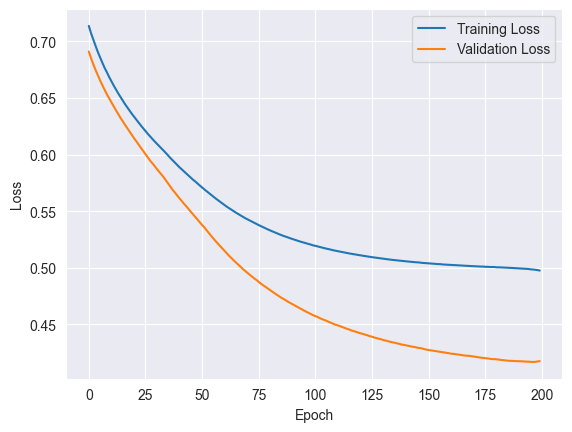

In [93]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicting using test data

In [94]:
ANN_prediction = model.predict(test)
ANN_prediction = np.where(ANN_prediction >= threshold, 1, 0)
ANN_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]])